# 1: Probability Theory

**Definition:** A <u>probability function</u> on a sample space $S$ with a sigma algebra $\mathcal{B}$ is a function $P$ with domain $\mathcal{B}$ that satisfies 
1. $P(A)\geq 0 ~\forall A \in \mathcal(B)$
2. $P(S) = 1$
3. for pairwise disjoint sets $P(\cup_{i}A_i) = \sum\limits_{i}P(A_i)$.

**Bonferoni's inequality**: $P(A\cap B) \geq P(A) + P(B)-1$ is nice to internalize for probabilities close to 1. For example, if there is a 95% chance of Seth coming over and a 98% chance of Luke coming over, then there is at least a probaility of $.95+.98 -1 = (1-.05)+ (1-.02) -1 = 1-.07 = 93\% $of them both coming. This theorem works as a kind of "not likely" additivity: 99% chance of not getting a royal flush, 98% chance of not getting a flush, so at least 97% chance of neither.

**Definition:** A random variable is a <u>continuous random variable</u> if its CDF is continuous. 

**Definition:** A random variable is a <u>discrete random variable</u> if its CDF is a step function. 

Me: Interestingly, they define this in terms of the resulting CDF instead of in terms of the underlying random variable as a function from the sample space. I'm also fascinated by the possibility of a combination, like a piecwise exponential instead of a piecewise contanst function.

----
**Dfn:**
The random variables $X$ and $Y$ are **identically distributed** if for all $A \in B^1$ (the smallest algebra containing all intervals of the form $(a,b), (a,b], [a,b),$ and $[a,b]$) 
$$
P(X\in A) = P(Y\in A).
$$
----
This does not mean that the two random variables $X$ and $Y$ are equal. In fact, their domains do not need to be the same for the distributions to be the same.

**e.g.** Toss 3 coins, $X$ is number of times heads appears, $y $ is number of times tails appears. 
$$P_X(1 ) = P\left( \left\{[H,T,T], [T,H,T], [T,T,H] \right\} \right) = 3/8$$
$$P_Y(1 ) = P\left( \left\{ [H,H,T], [H,T,H], [T,H,H]\right\} \right) = 3/8$$
etc. 

e.g. $X$ is umber of heads that come up in 2 coins, $Y$ is the number of even cards in 2 draws from deck with cards 1-10, with replacement. The sample spaces **not** are the same but the probaility distributions are. 






I'd love to come up with some explicit examples of normal distributions explicitly calculated by probability function and random variables that are differet but give IID distributions. Bu I do not have a foothod. 

# Ch2 Transformations and Expectations

$Y=g(X)$ conveys that the random variable $Y$ is built from the random variable $Y$. Formally it means that 
$g:\text{range}X \to \mathbb{R}$

- C&B say: "from the sample space $\cal{X}$ of $X$  to the sample space $\cal{Y}$ of $Y$." But the sample space of $X$ is certainly the domain of $X$... ?!? 
- then they say it is best to use ${\cal{X}} = \{x\,|\,f_X (x)>0\}$ and $\cal{Y} = \{y~|~ \exists x~ (y=g(x))\}$
- Thus by sample space of a random variable they mean the range, not the domain (which is the sample space of the experiment) and this is the source of my annoyance with this whole thing. 

If $\Omega$ is the sample space of an experiement with probabilty function $P$, then 
 - the pmf $P_X(x) := P(X^{-1}(x))$
 - the pmf $P_Y(g(x)):=P\left( X^{-1} \circ g^{-1}(g(x) ) \right)$

The way that PDFs change with variables is described here in terms of a partition of the domain  $\cal{X}$ into intervals on which $g(x)$ is increasing, decreasing, or is constant. I have not found a way to concixely present it... but feel draw to working thusly. 

**Answer to an old question:**
The distribution $Y = g(X) = F_{X}(X)$ is very interesting 
- increasing or constant
- range $[0,1]$
- random sampling on $[0,1]$ is mapped by $g^{-1}$ to sampling according to the pdf $f_X$. 

# 5: Basic Properties of Random Samples

This chapter aims to describe a process called **random sampling**, which is an experiment consisting of several observations on a variable. 

Ch4 had examples.

## 5.2 Basic Concepts

**Definition:** The sequence  $[X_1, \dots,X_n]$ of random variables is a **random sample** of size $n$ from the population $f(x)$ if the random variables are mutually independent.

Another term for this is **independent and identically distributed** or iid; the random variables are mutually independent and each has the same marginal pdf (or pmf) $f(x)$.

The joint pdf (or pmf) of $Y=(X_1,\dots,X_n)$ is $f(x_1,\dots,x_n) = \prod\limits_{i=1}^n f(x_i)$.

We say that each $X_k$ is an observation on the same variable. Note that the situation being modeled here is sampling with replacement (draw number from a hat, record, put it back, draw again) or **sampling from an infinite population**. Modifications are required for sampling without replacement from a finite population. People often neglect this. 

### Me Speculating

An example is the relationship between the exponential distribution ${\rm expon}: (0,\infty)\to \mathbb{R}$ and the gamma distribution $\gamma: (0,\infty)^n \to \mathbb{R}$.

The beta function is applicable to situations where the time rate rate of probability is constant. For example, if five busses come to a buss stop per hour, or one every 12 minutes, the the pdf for the arrival of the next bus is $f(t) = 12 e^{\frac{1}{12{\rm min} } t}$. 

In [3]:
from scipy import stats
expon = stats.expon(scale=12)


In [7]:
expon.mean(), expon.std()

(12.0, 12.0)

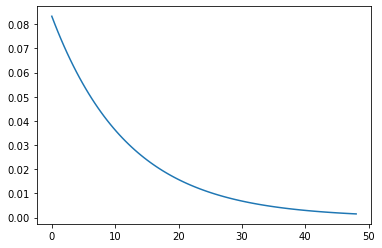

In [10]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0,48,100)
ys = expon.pdf(xs)
plt.plot(xs,ys);

The gamma function models multiple exponentialy decaying observables; if there are $\alpha$ busses, and each comes by every 12 minutes... oop... I see that gamma is the sum of lots of expons.... Not the product. This is a later section in Casella. 

Likely, preducts of distributions are not interesting enough to get their own names. With the exception of the binomial distribution perhaps? 

The binomial distribution is also a distribution of a sum of idd Bernoulli distributed random variables. So... I still lack a named common example of a product of random variables. 

## 5.2 Sums of Random Variables from a Random Sample

When a random sample is drawn, some summary of the values $T(x_1,\dots,x_n)$ is usually computed. The domain of $T$ includes the sample space $\Omega^n$ of the random vector $(X_1,\dots,X_n)$, and therefore the summary $T$ is a random variable $Y:=T=T(X_1,\dots,X_n):\Omega^n\to \mathbb{R}$. Since the distribution of $Y$ is derived from the distribution of the $X_k$, the distribution of $Y$ is called **the sampling distribution** of $Y$ to distinguish
- the probability distribution of the $X_k$ ( the sample distribution) from
- the probability distribution of $Y$ ( the sampling distribution).  

**Definition** $Y$ is  called a **statistic**. 

**Definition:** The probability distribution of $Y$ is the **sampling distribution** of $Y$. 

The restrictive nature of these definition is that statistic canot be a functin of a parameter. 

### Examples of statistics:
**Definition:** The **sample mean** of the random sample $(X_1,\dots,X_n)$ is the statistic $$ \bar{X}(X_1,\dots,X_n):=\frac{X_1 + \cdots +X_n}{n}.$$

Note that the function notation is typically supressed, and that this really is meant to be a random variable; Casella says that lover case $\bar{x}$ is used for observed values of the random variable $\bar{X}$. 

**Lemma:** If $X_1,\dots,X_n$ i a random sample from a population and the pdf of the $X_k$ is $g$ such that $\mathbb{E} \left( g(X_1)\right)$ and $\rm{Var} \left( g(X_1) \right)$ exist, then 
$$
\mathbb{E}\left(\sum_{i=1}^n g(X_i) \right) = n\, \mathbb{E}(g(X_1)), 
$$
and
$$
{\rm Var}\left(\sum_{i=1}^n g(X_i)\right) = n\left( {\rm Var}(g(X_1)) \right).
$$

**Proof:** The first follows from the linearity of $\mathbb{E}$ and the identically distributed nature of the $X_i$. For the second, we start with the definition of varience;
$$
{\rm Var}\left( \sum_{i=1}^n g(X_i)\right) = \mathbb{E}\left[ \sum_{i=1}^n g(X_i) - \mathbb{E}\left( \sum_{i=1}^n g(X_i) \right)   \right]^2
$$

$$
=\mathbb{E}\left[  \sum_{i=1}^n \left(g(X_i) - \mathbb{E}(g(X_i))  \right)  \right] ^2
$$


The cross terms with $i\neq j$ are zero since they are 
$$
\mathbb{E}\left( \left[ g(X_i)-\mathbb{E}(g(X_i))\right] 
\left[ g(X_j)-\mathbb{E}(g(X_j))\right]
\right) =: {\rm Covar} (g(X_i),g(X_j) ) =0
$$
because the x_i are iid and thus independent. The diagonal terms 
$$
\mathbb{E}\left( \left[ g(X_i) -\mathbb{E}(g(X_i)) \right]^2 \right) = {\rm Var}(g(X_i)).
$$
Last, note that by idenitical distribution, the variance of each $g(X_i)$ is the same. ${\rm \square}$

**Theorem:** Further, if $\mathbb{E}(g(X_1))=\mu$ and ${\rm Var}(g( X_1)) = \sigma^2$ then
$$\mathbb{E} (\bar{X}) = \mu$$
and
$$
{\rm Var}( \bar{X}) = \sigma^2/n.
$$

**Proof:** The first comes from linearity of $\mathbb{E}$ and the n-terms of equal value and the $1/n$. 

For the second, 
$$
{\rm Var} \left(  \frac1n \sum_{i=1}^n X_i \right) 
= \frac{1}{n^2}  n {\rm Var} (X_1) 
$$
using the second result from the lemma above. $\square$






There is also $\mathbb{E}(S^2) = \sigma^2$ and the proof that the distribution is normal, but I am only so enduarnt. 

## Answering An old question of mine:

Random variables are a mathematical tool to push probabilities foward from the sample space $\Omega$ to some coordinate space $X(\Omega)$ for the sample space with the welcome possibility of $X$ being many to one so that $X^{-1}$ is one to many, and the events $X^{-1}(\omega)$ can contain multiple outcomes.

The idea is that the sequence of random variables $[X_1,\dots,X_n]$ is a function with domain $\Omega^n$, and that when repeated abservations are made, thereby obtaining a sequence of outcomes $[\omega_1,\dots,\omega_n]$ the random vector maps this vector to $[x_1,\dots,x_n]$. 

### On Convolution and sums of random variables

I can't resist making a note of this:

**Theorem 5.2.9:** If $X$ and $Y$ are independent continuous random variables with pdfs $f_X$ and $f_Y$, then the pdf of $Z=X+Y$ is the convolution 
$$
f_Z(z) = \int_\mathbb{R} f_X(w)f_Y(z-w) dw.
$$